In [1]:
## IMPORT DEPENDENCIES
# Pandas
import pandas as pd
import psycopg2

#%matplotlib Notebook
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#!/usr/bin/env python
import config as cfg

In [3]:
# Set up a connection to the postgres server.
# establish connection

Connection = psycopg2.connect("dbname=YourDatabase port=YourPort user=YourUserName password=YourPassword")

print("Connected!")

Connected!


In [4]:
# Query SALARIES table

Employee_DF = pd.read_sql(
    "SELECT * \
    FROM EMPLOYEE AS E \
    INNER JOIN SALARIES AS S \
    ON E.EMPLOYEE_NO = S.EMPLOYEE_NO \
        INNER JOIN TITLES AS T \
        ON E.EMPLOYEE_NO = T.EMPLOYEE_NO", 
    Connection
)


In [5]:
# print data
Employee_DF.head()

,employee_no,birth_date,first_name,last_name,gender,hire_date,employee_no,salary,from_date,to_date,employee_no,title,from_date,to_date
0,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,"$78,228.00",1989-09-12,1990-09-12,10005,Senior Staff,1996-09-12,9999-01-01
1,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,"$78,228.00",1989-09-12,1990-09-12,10005,Staff,1989-09-12,1996-09-12
2,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,"$72,488.00",1996-11-24,1997-11-24,10010,Engineer,1996-11-24,9999-01-01
3,10011,1953-11-07,Mary,Sluis,F,1990-01-22,10011,"$42,365.00",1990-01-22,1991-01-22,10011,Staff,1990-01-22,1996-11-09
4,10013,1963-06-07,Eberhardt,Terkki,M,1985-10-20,10013,"$40,000.00",1985-10-20,1986-10-20,10013,Senior Staff,1985-10-20,9999-01-01


In [6]:
# Print salary column
Employee_DF["salary"]

0         $78,228.00
1         $78,228.00
2         $72,488.00
3         $42,365.00
4         $40,000.00
             ...    
443303    $41,002.00
443304    $40,000.00
443305    $52,282.00
443306    $40,000.00
443307    $40,000.00
Name: salary, Length: 443308, dtype: object

In [7]:
# Data types
Employee_DF.dtypes

employee_no     int64
birth_date     object
first_name     object
last_name      object
gender         object
hire_date      object
employee_no     int64
salary         object
from_date      object
to_date        object
employee_no     int64
title          object
from_date      object
to_date        object
dtype: object

In [8]:
# remove $ sign format and convert from object to float
Employee_DF["salary"] = Employee_DF["salary"].replace('[\$,]', 
                                                      '', 
                                                      regex=True
                                                     ).astype(float)

In [9]:
# Data types
Employee_DF.dtypes

employee_no      int64
birth_date      object
first_name      object
last_name       object
gender          object
hire_date       object
employee_no      int64
salary         float64
from_date       object
to_date         object
employee_no      int64
title           object
from_date       object
to_date         object
dtype: object

In [10]:
len(Employee_DF)

443308

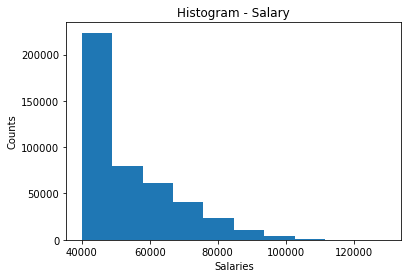

In [11]:
# Salary, Histogram
plt.hist(Employee_DF["salary"])
plt.title('Histogram - Salary')
plt.ylabel('Counts')
plt.xlabel('Salaries')
plt.show()


In [12]:
Employee_DF_Grouped = Employee_DF.groupby('title')

In [13]:
Salary_AVG = Employee_DF_Grouped['salary'].mean()
Salary_AVG

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

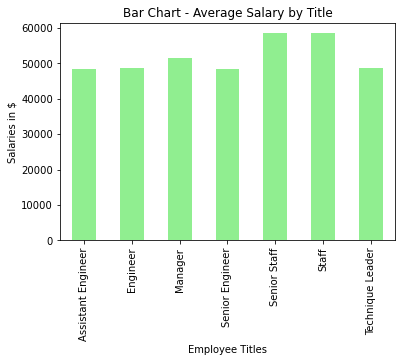

In [14]:
# Average Salary by Title, Bar Chart
Salary_AVG.plot(kind="bar",
                color='lightgreen'
               )
plt.title('Bar Chart - Average Salary by Title')
plt.ylabel('Salaries in $')
plt.xlabel('Employee Titles')
plt.show()
